In [1]:
import numpy as np
import time

In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [3]:
device = 'cuda'

In [22]:
emails = np.loadtxt('Fake email2.txt',dtype='object')

In [23]:
for i in range(20,30):
    print(names[i])
print('.\n.\n.')
print(names.shape)
print(type(names))

guialbu@comcast.net
sjmuir@gmail.com
iapetus@att.net
iamcal@yahoo.ca
fraser@yahoo.ca
bryam@gmail.com
mastinfo@yahoo.com
marioph@aol.com
bowmanbs@hotmail.com
mhanoh@hotmail.com
.
.
.
(5000,)
<class 'numpy.ndarray'>


In [24]:
alphabets = {'.':0,'a':1,'b':2,'c':3,'d':4,'e':5,'f':6,'g':7,'h':8,'i':9,'j':10,'k':11,'l':12,'m':13,'n':14,'o':15,'p':16,'q':17,
            'r':18,'s':19,'t':20,'u':21,'v':22,'w':23,'x':24,'y':25,'z':26,'1':27,'2':28,'3':29,'4':30,'5':31,'6':32,'7':33,
             '8':34,'9':35,'0':36,'@':37,'-':38,'#':39,'$':40,';':41}

In [25]:
rev_alphabets={}
for i in alphabets:
    rev_alphabets[alphabets[i]] = i

rev_alphabets

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 27: '1',
 28: '2',
 29: '3',
 30: '4',
 31: '5',
 32: '6',
 33: '7',
 34: '8',
 35: '9',
 36: '0',
 37: '@',
 38: '-',
 39: '#',
 40: '$',
 41: ';'}

In [26]:
input_size = output_size = len(alphabets)
hidden_size = 64
num_layers = 2
learning_rate = 0.001
num_epochs = 9

In [27]:
def encodings(word,alphabets):
    op_word = word[1:] + ';'
    l = len(word)
    ip_word_enc = torch.zeros([l,input_size])
    op_word_enc = torch.zeros([l],dtype=torch.long)
    
    for i in range(l):
        ip_word_enc[i,alphabets[word[i]]] = 1
        op_word_enc[i] = alphabets[op_word[i]]
    return(ip_word_enc,op_word_enc)

In [28]:
a,b = encodings(names[0].lower(),alphabets)
b

tensor([ 1, 19,  1, 18,  9, 21, 19, 37, 13, 19, 14,  0,  3, 15, 13, 41])

In [29]:
class RNN(nn.Module):
    def __init__(self,input_size,hidden_size,num_layers,output_size):
        super(RNN,self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size,hidden_size,batch_first=True,num_layers=self.num_layers)
        self.fc = nn.Linear(hidden_size,output_size)
        self.dropout = nn.Dropout(0.1)
        
    def forward(self,input,hidden):
        output,hidden = self.gru(input,hidden)
        output = self.fc(output)
        output = self.dropout(output)
        return(output,hidden)
    
    def initHidden(self):
        return torch.zeros([self.num_layers,1,self.hidden_size])

In [30]:

model = RNN(input_size,hidden_size,num_layers,output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)


In [31]:
loss_list = []
for i in range(num_epochs):
    t1 = time.time()
    loss_list1 = []
    for word in emails :
        ip_word_enc, op_word_enc = encodings(word.lower(),alphabets)
        
        ip_word_enc = ip_word_enc.reshape([1,ip_word_enc.shape[0],ip_word_enc.shape[1]])
        #op_word_enc = op_word_enc.reshape([1,op_word_enc.shape[0],op_word_enc.shape[1]])

        ip_word_enc = ip_word_enc.to(device)
        op_word_enc = op_word_enc.to(device)

        #print(ip_word_enc.shape)
        model.zero_grad()
        optimizer.zero_grad()

        hidden = model.initHidden().to(device)
        
        out,hidden = model(ip_word_enc,hidden)
        out = out.reshape(-1,output_size)
        #print(out.shape)
        loss = criterion(out,op_word_enc)
        loss_list1.append(loss.item())
        loss.backward()
        optimizer.step()
    t2 = time.time()
    print("epoch_loss :",np.mean(loss_list1)," |  time :",t2-t1,"sec")
    loss_list += loss_list1

epoch_loss : 1.6724615118980408  |  time : 41.6134295463562 sec
epoch_loss : 1.305097026014328  |  time : 39.1786367893219 sec
epoch_loss : 1.2216439010202884  |  time : 39.06893444061279 sec
epoch_loss : 1.1251327694058417  |  time : 38.24730443954468 sec
epoch_loss : 1.030736744338274  |  time : 39.950786113739014 sec
epoch_loss : 0.937841294080019  |  time : 39.84215712547302 sec
epoch_loss : 0.867363235706091  |  time : 38.17524433135986 sec
epoch_loss : 0.8091356927901506  |  time : 24.740548133850098 sec
epoch_loss : 0.7764033589959145  |  time : 20.2272789478302 sec


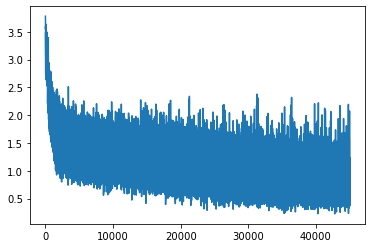

In [32]:
plt.plot(loss_list)

In [37]:
torch.save(model.state_dict(),'CharLevelRNN_GRU_emails.pth')

### Loading model

In [21]:

model.load_state_dict(torch.load('CharLevelRNN_GRU_emails.pth'))
model.eval()

RNN(
  (gru): GRU(27, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=27, bias=True)
)

### Sampling


In [34]:
def generate(a):

    a_enc = torch.zeros([1,1,input_size]).to(device)

    a_enc[0,0,alphabets[a]] = 1
    hidden = model.initHidden().to(device)
    
    output,hidden = model(a_enc,hidden)
    #print(output)
    letter = rev_alphabets[torch.argmax(output).item()]
    output = torch.zeros(1,1,input_size).to(device)
    output[0,0,alphabets[letter]] = 1
    #output = F.softmax(output,dim=-1)
    #print(output)
    a += letter
    
    while letter!=';':
        #print(output)
        output,hidden = model(output,hidden)
        
        letter = rev_alphabets[torch.argmax(output).item()]
        #output = F.softmax(output,dim=-1)
        output = torch.zeros(1,1,input_size).to(device)
        output[0,0,alphabets[letter]] = 1
        a += letter
        
    return(a)

In [36]:
for i in alphabets:
    if i==';' or i.isdigit() or i=='#' or i=='$':
        continue
    word = generate(i)
    print("for {} : {}".format(i,word))

for . : .com;
for a : andres@iclitd.net;
for b : british@icloud.com;
for c : carroll@att.net;
for d : dalawb@yahoo@aot.net;
for e : evilopiel@gmai5.com;
for f : frode@msn.com;
for g : grothoff@msw.coy;
for h : hahiss@me.c4;
for i : isaacsp@me4#won.net2.net;
for j : joelw@yahoo.com;
for k : konst@msn.com;
for l : lamky@msn.com;
for m : marioph@attxntine.net4n4ine.net;
for n : nasor@att.net;
for o : oecohell@me.com;
for p : paina@gmail.com;
for q : quanstaol@aol.2os;
for r : raines@me.com;
for s : steve@msn.com;
for t : treeves@msn.com;
for u : unreal@msn.com;
for v : veldez@gmail.com;
for w : willer@mac.com;
for x : xtang@att.nex;
for y : yzheng@att.net;
for z : ziglo@outlooku#nli5e.net;
for @ : @att.net;
for - : -arastag@aol.com;
